In [1]:
from image_analyzer import Image_analyzer
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
file_dir = os.getcwd()
images_dir = file_dir + "/images/"

fig_04_29_a_path = images_dir+"Fig0429(a)(blown_ic).pgm"
print(fig_04_29_a_path)

fig_04_29_a_analyzer = Image_analyzer(fig_04_29_a_path)

fig_04_29_a_analyzer.mypgmread()



/Users/fuad/Documents/coding/image_processing_tutorials/004_frequency_domain_analyze/images/Fig0429(a)(blown_ic).pgm
Reading image from: /Users/fuad/Documents/coding/image_processing_tutorials/004_frequency_domain_analyze/images/Fig0429(a)(blown_ic).pgm


(array([[ 75,  75,  75, ...,  36,  36,  37],
        [ 76,  76,  76, ...,  36,  35,  36],
        [ 75,  75,  75, ...,  35,  31,  34],
        ...,
        [135, 135, 132, ...,  41,  35,  37],
        [138, 138, 135, ...,  40,  34,  37],
        [138, 138, 135, ...,  40,  34,  37]], dtype=uint8),
 906,
 678,
 255)

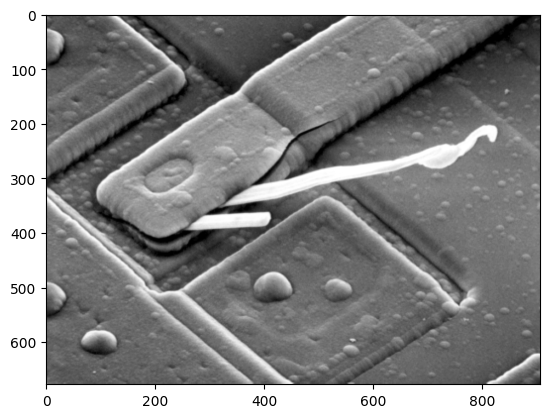

In [3]:
#show the image
plt.imshow(fig_04_29_a_analyzer.image_array, cmap='gray')

In [4]:
#take the fourier transform
foruier_image = fig_04_29_a_analyzer.myImageFourierTransform()
fourier_images_abs = np.abs(foruier_image)


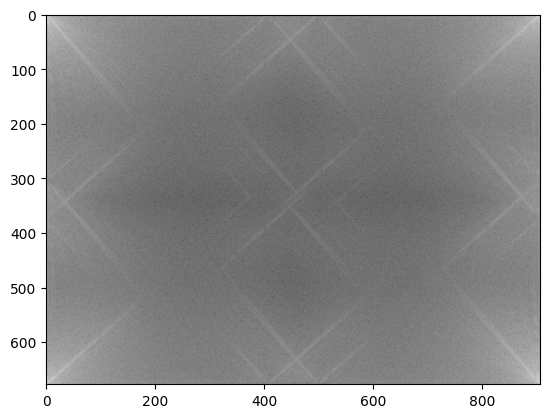

0.04987555173776901 69164646.0


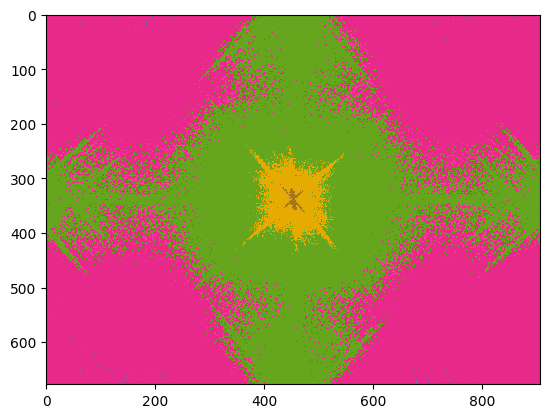

In [9]:
#show the image 
plt.figure()
plt.imshow(np.log(fourier_images_abs), cmap='gray')
plt.show()

print( np.min(fourier_images_abs) , np.max(fourier_images_abs))

#plot the shifted fourier transform
plt.figure()
plt.imshow(np.log(np.fft.fftshift(fourier_images_abs)), cmap='gray')
plt.show()
